### Using window functions with images
[link to example](https://scikit-image.org/docs/stable/auto_examples/filters/plot_window.html#sphx-glr-auto-examples-filters-plot-window-py)

Fast Fourier Transforms (FFTs) assume that the data being transformed represent one period of a periodic signal. Thus the endpoints of the signal to be transformed can behave as discontinuities in the context of the FFT. These discontinuities distort the output of the FFT, resulting in energy from "real" frequency components leaking into wider frequencies.

The effects of spectral leakage can be reduced by multiplying the signal with a window function. Windowing smoothly reduces the amplitude of the signal as it reaches the edges, removing the effect of the artificial discontinuity that results from the FFT.

In this example, we see that the FFT of a typical image can show strong spectral leakage along the x and y axes (see the vertical and horizontal lines in the figure). The application of a two-dimensional Hann window greatly reduces the spectral leakage, making the "real" frequency information more visible in the plot of the frequency component of the FFT.

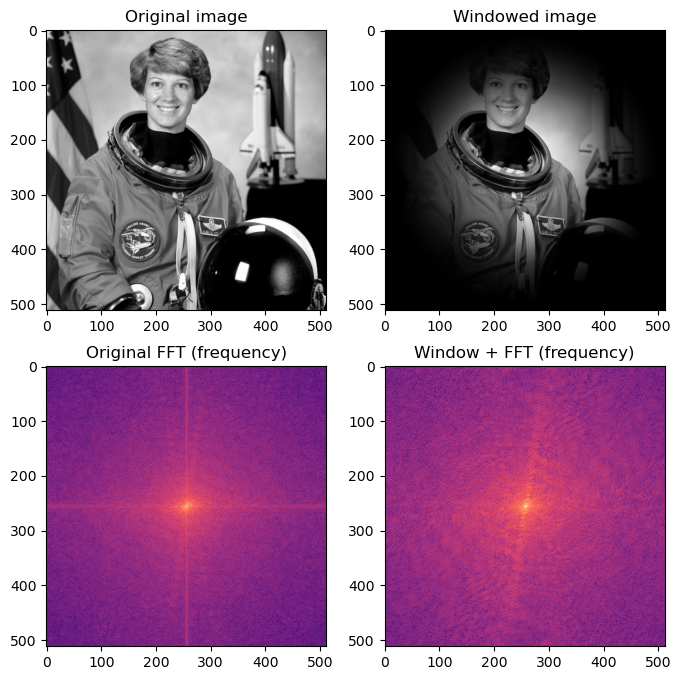

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window

image = img_as_float(rgb2gray(astronaut()))
wimage = image * window('hann', image.shape)

image_f = np.abs(fftshift(fft2(image)))
wimage_f = np.abs(fftshift(fft2(wimage)))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(wimage, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(wimage_f), cmap='magma')

plt.show()